## Creation of embeddings with DeepWalk

In [1]:
#From https://github.com/phanein/deepwalk
import deepwalk as dw

In [2]:
dw.start_deepwalk("--format adjlist --input ../data/cora.adjlist --number-walks 20 --representation-size 40 --walk-length 10 --window-size 10 --workers 1 --output ../data/cora1.embeddings")

2020-01-21 09:33:00 INFO deepwalk.py: 220 Parsed 2708 edges with 0 chunks in 0.0400083065032959s
2020-01-21 09:33:00 INFO deepwalk.py: 226 Converted edges to graph in 0.001989603042602539s
2020-01-21 09:33:00 INFO deepwalk.py: 57 make_directed: added missing edges 0.0030143260955810547s
2020-01-21 09:33:00 INFO deepwalk.py: 68 make_consistent: made consistent in 0.002973794937133789s
2020-01-21 09:33:00 INFO deepwalk.py: 86 remove_self_loops: removed 0 loops in 0.0009999275207519531s
2020-01-21 09:33:00 INFO deepwalk.py: 232 Made graph undirected in 0.007999658584594727s


Number of nodes: 2708
Number of walks: 54160
Data size (walks*length): 541600
Walking...
Training...


## K-means on the embeddings

In [9]:
from dgl.data import citation_graph as citegrh
import networkx as nx
import torch as th

data = citegrh.load_cora()
#features = th.FloatTensor(data.features)
labels = th.LongTensor(data.labels)
#g = data.graph

In [10]:
import pandas as pd
df = pd.read_csv("../data/cora1.embeddings",sep=" ",header=None, skiprows= 1)

In [11]:
df = df.sort_values(by=[0])
embeddings =  df.loc[:, df.columns != 0]
embeddings.head(1)

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
1547,-1.48207,-0.463904,-0.643441,-0.168564,0.28134,-0.441912,2.412907,-1.145908,-0.078474,0.215392,...,-0.033949,-0.265182,0.807596,0.575811,-0.003095,-0.452111,-1.073708,0.516716,0.408526,0.633142


In [12]:
import numpy as np

In [13]:
X = np.array(embeddings)

In [16]:
import performance as pf

In [18]:
from sklearn.cluster import KMeans
all_rand = []
all_mi = []
all_voi = []
for a in range(50):
    kmeans = KMeans(n_clusters=7, n_init=50, max_iter=1000).fit(X)
    
    rand = pf.rand_score(data.labels,kmeans.labels_)
    all_rand.append(rand)
    mi = pf.mutual_info_score(data.labels,kmeans.labels_)
    all_mi.append(mi)
    voi = pf.variation_of_information_score(data.labels,kmeans.labels_)
    all_voi.append(voi)

In [27]:
import numpy as np

In [31]:
print(np.mean(all_rand),np.mean(all_mi),np.mean(all_voi))

0.3826512895978069 0.4295753108237433 2.0597574779984575


In [32]:
print(np.std(all_rand),np.std(all_mi),np.std(all_voi))

0.024361372481601126 0.015699044032671812 0.04723509257015232


In [23]:
print(max(all_rand),max(all_mi),max(all_voi))

0.4105445752806442 0.4490937769284481 2.168953787990019


In [322]:
print(pf.rand_score(labels,kmeans.labels_))
print(pf.mutual_info_score(labels,kmeans.labels_))
print(pf.variation_of_information_score(labels,kmeans.labels_))

0.36206809547499097
0.41445164807467794
2.135280701683192


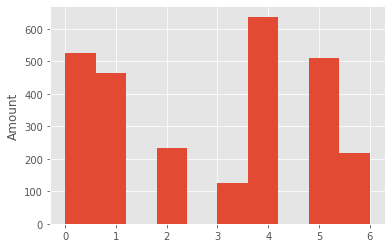

In [320]:
#Distribution of lables
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline
plt.hist(kmeans.labels_)
plt.ylabel('Amount');